In [1]:
from astropy import units as u
import setigen as stg
import matplotlib.pyplot as plt
%matplotlib inline

/home/obs/.conda/envs/seticore/lib/python3.10/site-packages/blimpy/__init__.py:21: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)

In [3]:
# noise = frame.add_noise(x_mean=3, noise_type='chi2')
noise = frame.add_noise_from_obs()
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=400),
                                            drift_rate=1.1*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.get_intensity(snr=25)),
                          stg.gaussian_f_profile(width=100*u.Hz),
                          stg.constant_bp_profile(level=1))

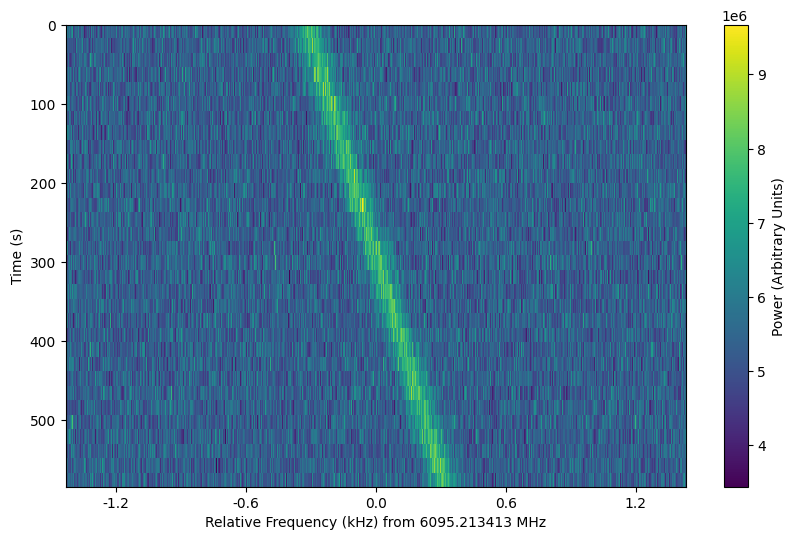

In [4]:
fig = plt.figure(figsize=(10, 6))
frame.plot(db=False)
plt.savefig("frame.png", bbox_inches='tight')
# plt.show()

In [5]:
frame.data.shape

(32, 1024)

In [24]:
frame.save_fil(filename='test_frame.fil')

blimpy.waterfall INFO     __write_to_fil_light: Writing the spectra matrix for test_frame.fil in one go.
blimpy.waterfall INFO     Conversion time: 0.00sec


In [25]:
waterfall = frame.get_waterfall()

Plotting Min Max
averaging along time axis...
Plotting Spectrum
extracting integration 0...
Plotting Waterfall
Plotting Timeseries
Plotting Kurtosis
Plotting Header


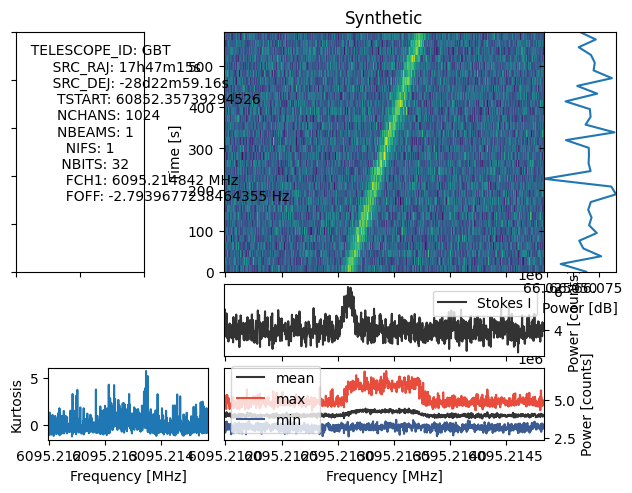

In [26]:
waterfall.plot_all()

In [27]:
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(200),
                                            drift_rate=2*u.Hz/u.s),
                          stg.constant_t_profile(level=1),
                          stg.box_f_profile(width=20*u.Hz),
                          stg.constant_bp_profile(level=1))